In [1]:
#https://www.kaggle.com/code/marcinrutecki/one-hot-encoding-everything-you-need-to-know
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
data = pd.DataFrame(pd.Series(['red', 'green', 'blue']))
new_data = pd.DataFrame(pd.Series(['red', 'green', 'blue', 'yellow', 'purple']))

In [4]:
gd_df = pd.get_dummies(data)

In [5]:
gd_df

,0_blue,0_green,0_red
0,False,False,True
1,False,True,False
2,True,False,False


In [6]:
print(gd_df)

   0_blue  0_green  0_red
0   False    False   True
1   False     True  False
2    True    False  False


In [7]:
col_list = gd_df.columns.to_list()

In [8]:
col_list

['0_blue', '0_green', '0_red']

In [9]:
new_df = pd.get_dummies(new_data)
new_df

,0_blue,0_green,0_purple,0_red,0_yellow
0,False,False,False,True,False
1,False,True,False,False,False
2,True,False,False,False,False
3,False,False,False,False,True
4,False,False,True,False,False


In [10]:
#handle unknown by using .reindex and .fillna()
new_df = new_df.reindex(columns=col_list).fillna(0)
new_df


,0_blue,0_green,0_red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,False
4,False,False,False


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [13]:
ohe.fit(data)
ohe.transform(new_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
import plotly.express as px
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

In [16]:
try:
    raw_df = pd.read_csv("../datasets/telco_churn.csv")
except:
    raw_df = pd.read_csv("../datasets/telco_churn.csv")

In [17]:
palette = ['#008080','#FF6347', '#E50000', '#D2691E']

In [18]:
df = raw_df.drop('customerID', axis=1)

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

ValueError: could not convert string to float: ' '

In [21]:
step1 = [len(i.split()) for i in df['TotalCharges']]

In [22]:
step2 = [i for i in range(len(step1)) if step1[i] != 1]

In [23]:
print('Number of entries with empty string: ', len(step2))

Number of entries with empty string:  11


In [24]:
df = df.drop(step2, axis=0).reset_index(drop=True)

In [25]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [26]:
print('Duplicated values:', df.duplicated().sum())

Duplicated values: 22


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
columns = list(df.columns)

In [30]:
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [31]:
categoric_columns =[]
numeric_columns = []


In [32]:
for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[: -1]

In [34]:
print('Numerical features: ',numeric_columns)
print('Categorical features: ',categoric_columns)

Numerical features:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [38]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1956,Female,0,No,No,42,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),60.15,2421.60
3135,Male,0,No,No,14,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.45,1117.55
5058,Male,0,Yes,No,44,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),54.30,2390.45
4647,Female,0,No,No,32,Yes,Yes,DSL,Yes,No,No,No,Yes,Yes,One year,No,Mailed check,74.75,2282.95
118,Female,0,No,No,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.65,835.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40
2039,Male,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,128.60
3866,Female,0,Yes,Yes,51,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),34.20,1782.00
6498,Female,0,Yes,Yes,58,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),93.40,5435.60


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
scaler.fit_transform(X_train[numeric_columns])
scaler.transform(X_test[numeric_columns])

array([[ 0.27610257,  1.01769998,  0.61931885],
       [-1.24037213, -1.53347618, -0.98780549],
       [-1.28135793, -1.33620306, -0.99803605],
       ...,
       [-1.19938633,  0.13498634, -0.90549797],
       [-0.05178385,  0.98259205,  0.30461881],
       [ 0.39905998,  1.17652156,  0.85307838]])

In [41]:
###One hot Encoding

In [42]:
categoric_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [44]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
      'PhoneService', 'MultipleLines', 'InternetService', 
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
      'TechSupport', 'StreamingTV', 'StreamingMovies', 
      'Contract', 'PaperlessBilling', 'PaymentMethod'] ))

In [45]:
transformed = transformer.fit_transform(X_train)

In [46]:
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [47]:
transformed_df.index = X_train.index

In [48]:
transformed_df

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_No,onehotencoder__PhoneService_Yes,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
1956,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2039,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3866,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6498,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [49]:
X_train = pd.concat([X_train, transformed_df], axis=1)

In [50]:
X_train.drop(categoric_columns, axis=1, inplace=True)

In [51]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
1956,42,60.15,2421.60,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,14,76.45,1117.55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,44,54.30,2390.45,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,32,74.75,2282.95,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,41,20.65,835.15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [52]:
transformed = transformer.transform(X_test)

In [53]:
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [54]:
transformed_df.index = X_test.index

In [55]:
X_test = pd.concat([X_test, transformed_df], axis=1)

In [56]:
X_test.drop(categoric_columns, axis=1, inplace=True)

In [57]:
X_test.head()

,tenure,MonthlyCharges,TotalCharges,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_0,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_No,onehotencoder__Partner_Yes,onehotencoder__Dependents_No,...,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_No,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
5770,39,95.55,3692.85,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1129,2,19.25,48.35,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2290,1,25.15,25.15,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
658,37,20.35,697.65,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3623,17,25.15,412.60,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [58]:
X_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [59]:
X_test.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__SeniorCitizen_0', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_No', 'onehotencoder__Partner_Yes',
       'onehotencoder__Dependents_No', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_No', 'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_N

In [60]:
X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

In [61]:
X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes', 
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes', 
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes', 
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes', 
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes', 
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

In [62]:
X_train.head()

,Tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
1956,42,60.15,2421.60,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3135,14,76.45,1117.55,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5058,44,54.30,2390.45,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4647,32,74.75,2282.95,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
118,41,20.65,835.15,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)

In [65]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=5000, random_state=13)

In [66]:
y_pred= clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test, y_pred)

0.8020536223616657

/var/folders/71/bstmy0hd0js1kdfnpn44lmzh0000gp/T/ipykernel_39243/167853693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')
/var/folders/71/bstmy0hd0js1kdfnpn44lmzh0000gp/T/ipykernel_39243/167853693.py:4: UserWarning: 
The palette list has fewer values (4) than needed (46) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


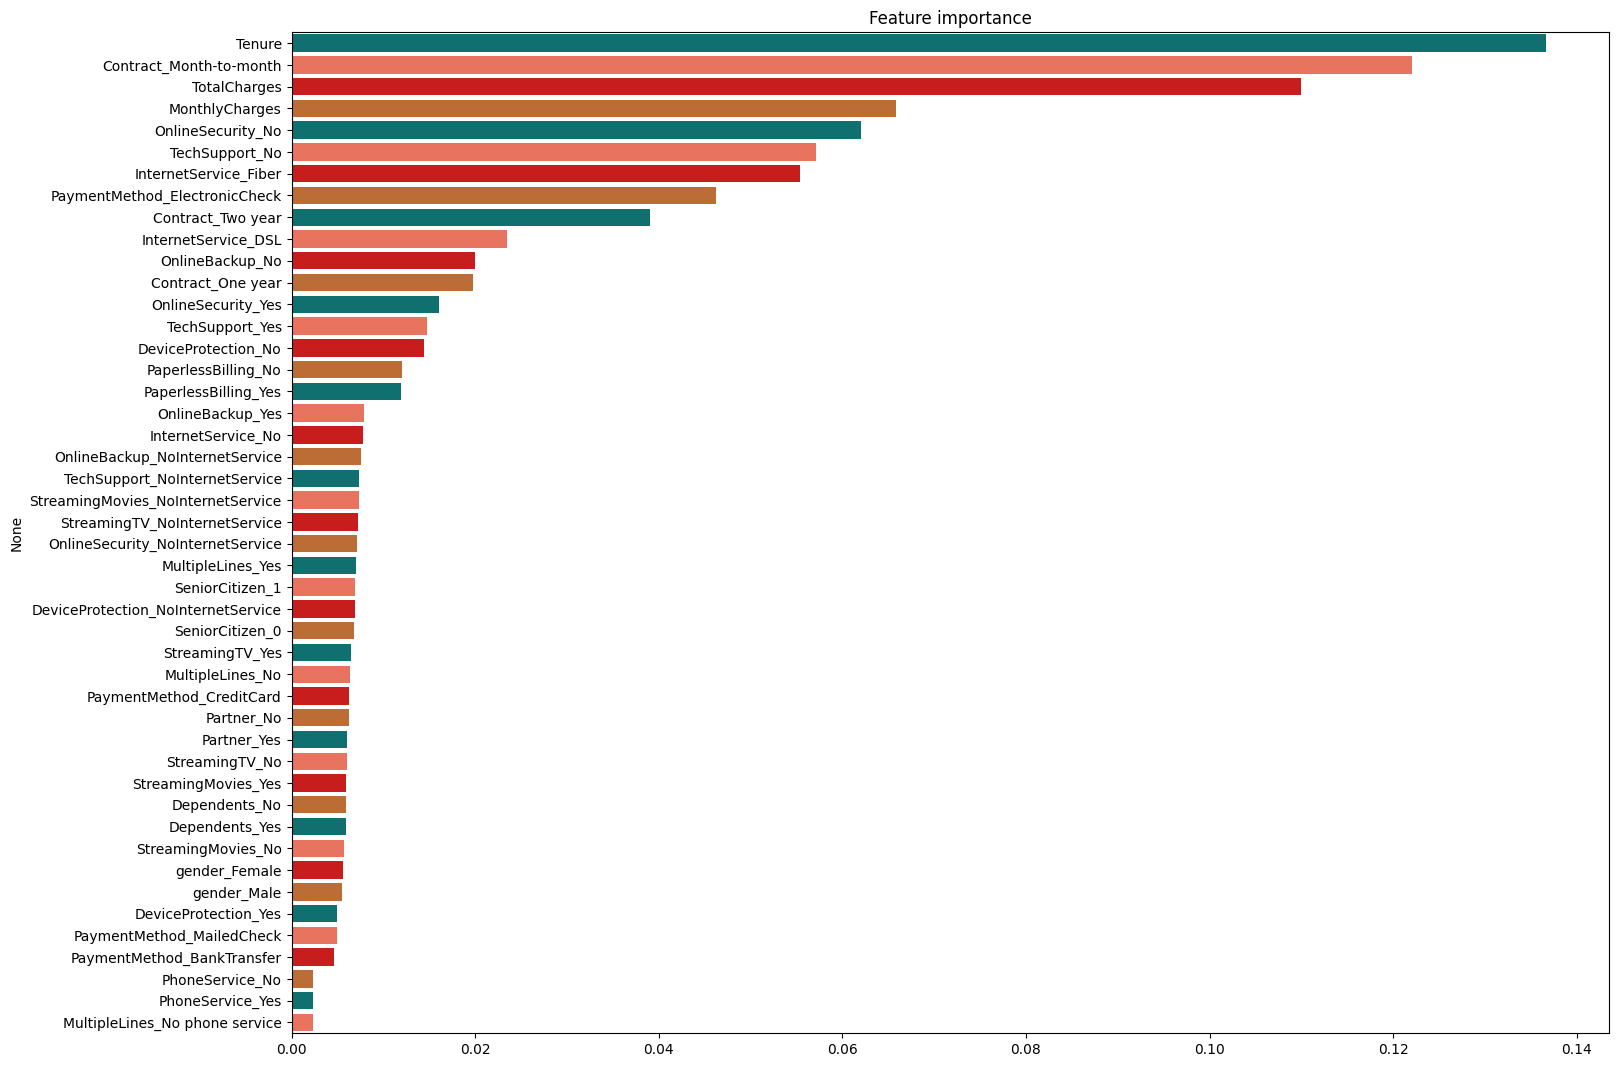

In [69]:
fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')